In [1]:
from sklearn.datasets import make_moons

In [56]:
data = make_moons(n_samples=500, noise=0.1)
data = data[0]

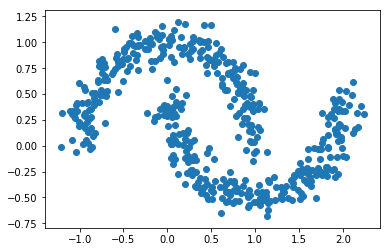

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data[0:,0:1], data[0:,1:2])
plt.show()

In [62]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.5, min_samples=3)
model = dbscan.fit(data)
print (model)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=None, p=None)


In [63]:
import pandas as pd

df = pd.DataFrame(data=list(zip(model.core_sample_indices_, model.labels_)), columns=['Index','Cluster'])

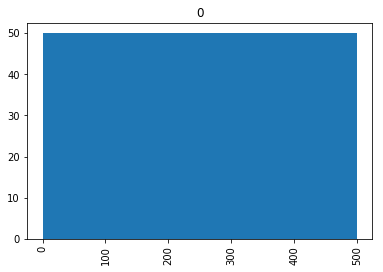

In [64]:
df['Index'].hist(by=df['Cluster'])
plt.show()

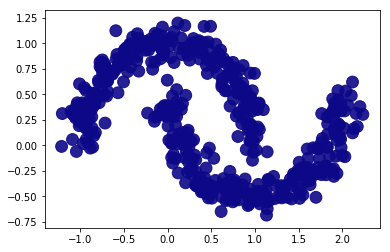

In [65]:
plt.scatter(data[:,0], data[:,1], c=model.labels_, s=140, alpha=0.9, cmap="plasma")
plt.show()